In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

area = []
price = []
data= pd.read_csv("Data.csv", sep=';')


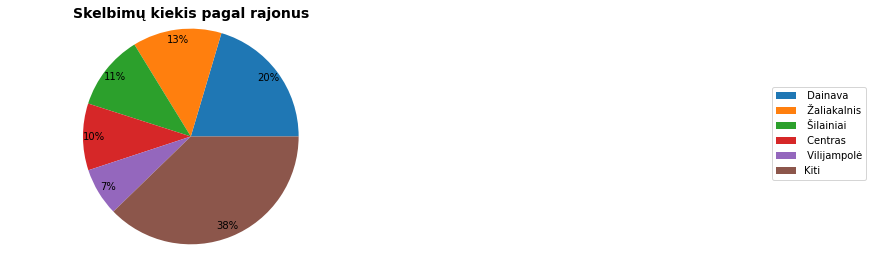

In [4]:
newdf = pd.DataFrame({'Area': data.Area})
df = newdf.pivot_table(columns=['Area'], aggfunc='size').reset_index()
#the full dataframe
df = pd.DataFrame(
    data = {'country': df[df.columns[0]], 'value' : df[df.columns[1]]},
    ).sort_values('value', ascending = False)

#the top 5
df2 = df[:5].copy()

#others
new_row = pd.DataFrame(data = {
    'country' : ['Kiti'],
    'value' : [df['value'][5:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])

#plotting -- for comparison left all countries and right 
#the others combined
plt.gca().axis("equal")
pie = plt.pie(df2.value, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
labels=df2.country
plt.title('Skelbimų kiekis pagal rajonus', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(2,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

plt.show()

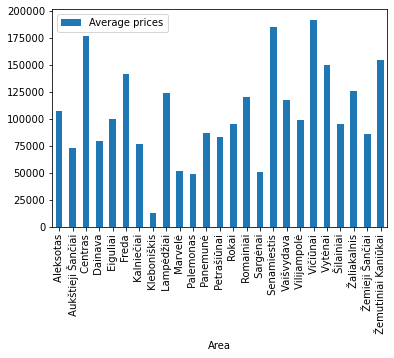

In [6]:
df = pd.DataFrame({'Area': data.Area,'Average prices': data.Price})
mean_df = df.groupby('Area').mean().reset_index()
mean_df.plot(x ='Area', y='Average prices', kind = 'bar')
plt.show()